# Lab 07-2. MNIST Introduction

### Example of MNIST

- 28x28 image
- 1 channel gray image
- 0~9 digits

In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import random

In [29]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [20]:
mnist_train = datasets.MNIST(root="MNIST_data/",
                             train=True,
                             transform=transforms.ToTensor(),
                             download=True)

mnist_test = datasets.MNIST(root="MNIST_data/",
                            train=False,
                            transform=transforms.ToTensor(),
                            download=True)

In [14]:
batch_size = 100

In [21]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

# https://pytorch.org/docs/stable/data.html?highlight=torch+utils+dataloader#torch.utils.data.DataLoader

In [22]:
# MNIST data image of shape 28*28 = 724
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [33]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=1e-1)

In [44]:
training_epochs = 15
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader) # 600

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784(28*28)]
        # label is not one-hot encoded
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost += cost / total_batch

    print(f'Epoch: {epoch+1:4d}   Cost: {avg_cost:.9f}')

print('Learning finished')

Epoch:    1   Cost: 0.534399569
Epoch:    2   Cost: 0.359173656
Epoch:    3   Cost: 0.331326246
Epoch:    4   Cost: 0.316613466
Epoch:    5   Cost: 0.307193965
Epoch:    6   Cost: 0.300410330
Epoch:    7   Cost: 0.295020789
Epoch:    8   Cost: 0.290554792
Epoch:    9   Cost: 0.287366927
Epoch:   10   Cost: 0.284360170
Epoch:   11   Cost: 0.281879216
Epoch:   12   Cost: 0.279639006
Epoch:   13   Cost: 0.277551413
Epoch:   14   Cost: 0.276049942
Epoch:   15   Cost: 0.274521887
Learning finished


**Test**

In [46]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print(f"Accuracy: {accuracy.item()*100:.4f}%")

Accuracy: 88.9800%


/home/inseo/.local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/inseo/.local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


**Visualization**

label: 5
Prediction: 5


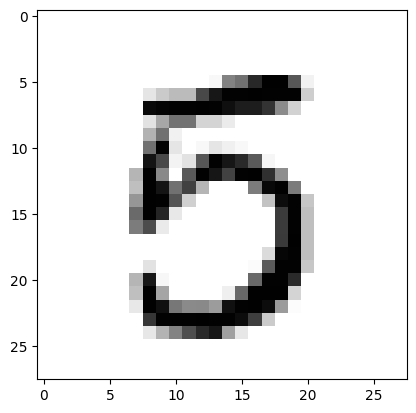

In [53]:
import matplotlib.pyplot as plt

r = random.randint(0, len(mnist_test)-1)
X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r+1].to(device)

print(f'label: {Y_single_data.item()}')
single_prediction = linear(X_single_data)
print(f'Prediction: {torch.argmax(single_prediction, 1).item()}')

plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap="Greys", interpolation="nearest")
plt.show()